In [20]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Weak Scaling
Random

In [21]:
tkrand = th.Thicket.from_caliperreader(glob("cali_data_cuda/*1.cali"))
tkrand.dataframe = tkrand.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

gbrand = tkrand.groupby("InputSize")

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afffba93ee0>, 262144: <thicket.thicket.Thicket object at 0x2afffbd27f40>, 1048576: <thicket.thicket.Thicket object at 0x2afffbd98190>, 4194304: <thicket.thicket.Thicket object at 0x2afffbd96760>, 16777216: <thicket.thicket.Thicket object at 0x2afffbd27c70>}


In [22]:
ctkrand = th.Thicket.concat_thickets(
    thickets=list(gbrand.values()),
    headers=list(gbrand.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctkrand.dataframe

65536  \
                                                               Avg time/rank   
node                                               num_threads                 
{'name': 'main_function', 'type': 'function'}      64               0.441457   
                                                   128              0.413766   
                                                   256              0.401742   
                                                   512              0.400148   
                                                   1024             0.410812   
{'name': 'comm', 'type': 'function'}               64               0.000337   
                                                   128              0.000327   
                                                   256              0.000300   
                                                   512              0.000294   
                                                   1024             0.000308   
{'name': 'comm_large', 'type': 'function'}         64               0.000275   
                                                   128              0.000266   
                                                   256              0.000242   
                                                   512              0.000233   
                                                   1024             0.000249   
{'name': 'cudaMemoryCopy', 'type': 'function'}     64               0.000240   
                                                   128              0.000235   
                                                   256              0.000211   
                                                   512              0.000204   
                                                   1024             0.000219   
{'name': 'comp', 'type': 'function'}               64               0.070740   
                                                   128              0.066482   
                                                   256              0.065028   
                                                   512              0.065731   
                                                   1024             0.066541   
{'name': 'comp_large', 'type': 'function'}         64               0.070711   
                                                   128              0.066449   
                                                   256              0.064993   
                                                   512              0.065699   
                                                   1024             0.066512   
{'name': 'correct_check', 'type': 'function'}      64               0.000228   
                                                   128              0.000271   
                                                   256              0.000279   
                                                   512              0.000270   
                                                   1024             0.000292   
{'name': 'data_initialization', 'type': 'functi... 64               0.001589   
                                                   128              0.001487   
                                                   256              0.001486   
                                                   512              0.001487   
                                                   1024             0.001514   

                                                                      262144  \
                                                               Avg time/rank   
node                                               num_threads                 
{'name': 'main_function', 'type': 'function'}      64               0.610710   
                                                   128              0.599601   
                                                   256              0.601345   
                                                   512              0.597056   
                                                   1024             0.

In [23]:
ctkrand.dataframe = ctkrand.dataframe.reset_index().drop(("node"), axis=1)
ctkrand.dataframe = ctkrand.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

<ipython-input-23-625f039d34c3>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctkrand.dataframe = ctkrand.dataframe.reset_index().drop(("node"), axis=1)


In [24]:
ctkrand.dataframe


65536        262144       1048576  \
                                Avg time/rank Avg time/rank Avg time/rank   
name                num_threads                                             
main_function       64               0.441457      0.610710      1.400698   
                    128              0.413766      0.599601      1.409046   
                    256              0.401742      0.601345      1.406067   
                    512              0.400148      0.597056      1.406383   
                    1024             0.410812      0.608548      1.407265   
comm                64               0.000337      0.000816      0.002185   
                    128              0.000327      0.000733      0.002079   
                    256              0.000300      0.000720      0.002100   
                    512              0.000294      0.000715      0.002094   
                    1024             0.000308      0.000740      0.002085   
comm_large          64               0.000275      0.000752      0.002122   
                    128              0.000266      0.000673      0.002017   
                    256              0.000242      0.000662      0.002041   
                    512              0.000233      0.000655      0.002031   
                    1024             0.000249      0.000681      0.002027   
cudaMemoryCopy      64               0.000240      0.000694      0.002071   
                    128              0.000235      0.000632      0.001973   
                    256              0.000211      0.000623      0.001997   
                    512              0.000204      0.000616      0.001988   
                    1024             0.000219      0.000635      0.001985   
comp                64               0.070740      0.266472      1.046915   
                    128              0.066482      0.260662      1.054172   
                    256              0.065028      0.263442      1.055382   
                    512              0.065731      0.265726      1.046024   
                    1024             0.066541      0.258765      1.049386   
comp_large          64               0.070711      0.266434      1.046874   
                    128              0.066449      0.260628      1.054131   
                    256              0.064993      0.263405      1.055340   
                    512              0.065699      0.265688      1.045985   
                    1024             0.066512      0.258727      1.049347   
correct_check       64               0.000228      0.000275      0.000325   
                    128              0.000271      0.000301      0.000328   
                    256              0.000279      0.000322      0.000322   
                    512              0.000270      0.000324      0.000305   
                    1024             0.000292      0.000227      0.000280   
data_initialization 64               0.001589      0.005854      0.023852   
                    128              0.001487      0.005842      0.023231   
                    256              0.001486      0.005858      0.023185   
                    512              0.001487      0.005858      0.023180   
                    1024             0.001514      0.005967      0.023400   

                                      4194304      16777216  
                                Avg time/rank Avg time/rank  
name                num_threads                              
main_function       64               4.625474     17.501258  
                    128              4.615560     17.755845  
                    256              4.642290     17.836248  
                    512              4.611209     17.461556  
                    1024             4.759127     17.456472  
comm                64               0.008067      0.029504  
                    128              0.008051      0.029199  
                    256              0.007980      0.029441  
                    512              0.008027 

In [25]:
main_function = ctkrand.dataframe.loc["main_function"]
comm = ctkrand.dataframe.loc["comm"]
comm_large = ctkrand.dataframe.loc["comm_large"]
cudaMemoryCopy = ctkrand.dataframe.loc["cudaMemoryCopy"]
comp = ctkrand.dataframe.loc["comp"]
comp_large = ctkrand.dataframe.loc["comp_large"]
correct_check = ctkrand.dataframe.loc["correct_check"]
data_initialization = ctkrand.dataframe.loc["data_initialization"]

regions = [main_function, comm, comm_large, cudaMemoryCopy, comp, comp_large, correct_check, data_initialization]
names = ["main_function", "comm", "comm_large","cudaMemoryCopy", "comp", "comp_large", "correct_check", "data_init"]

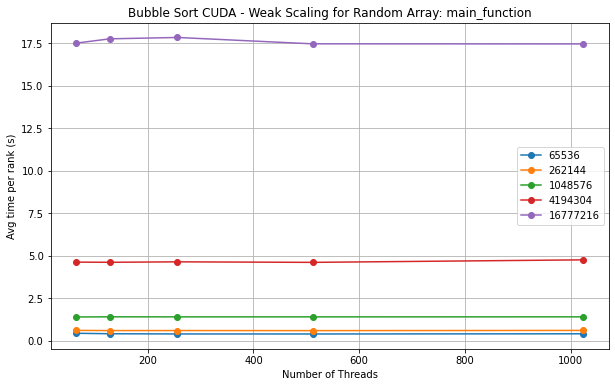

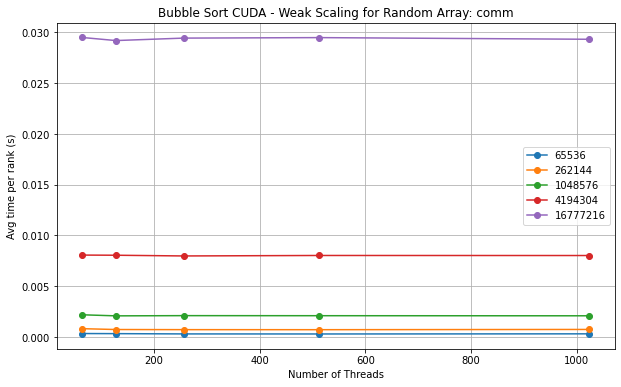

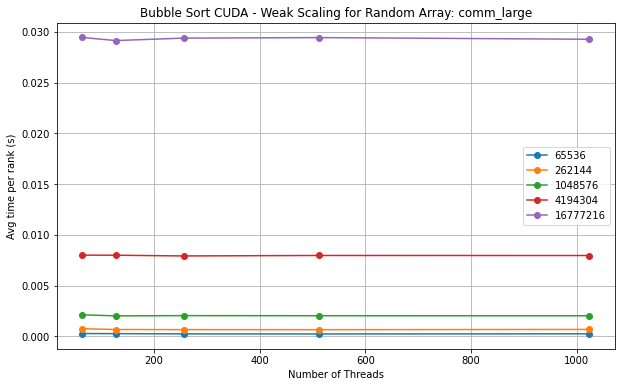

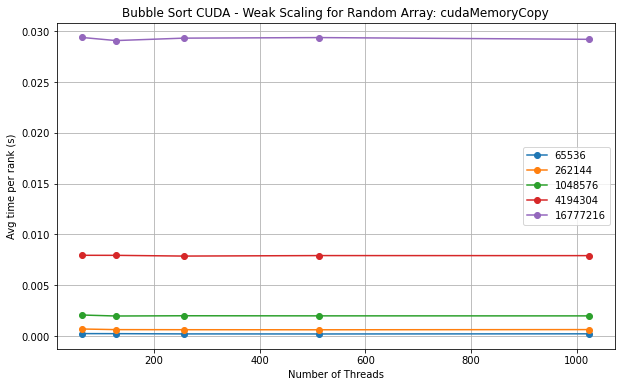

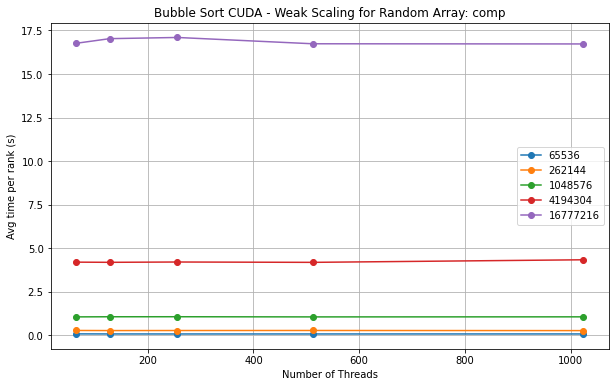

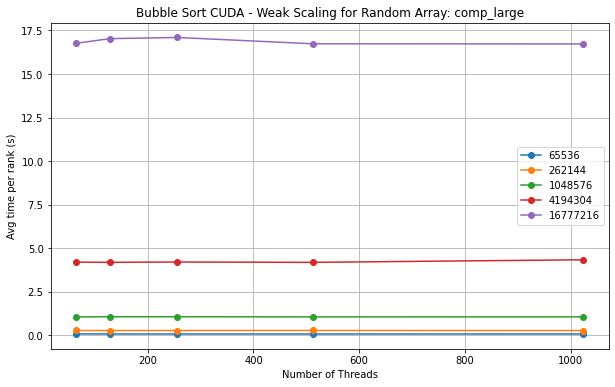

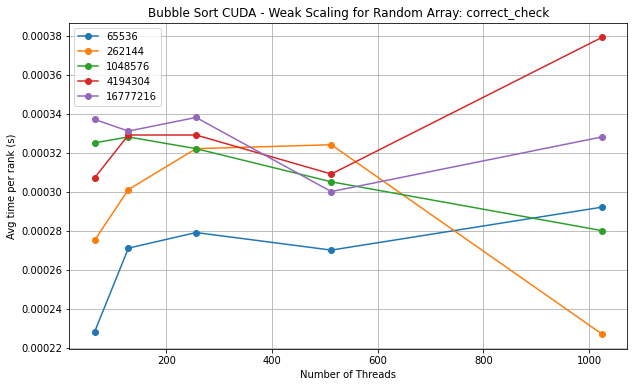

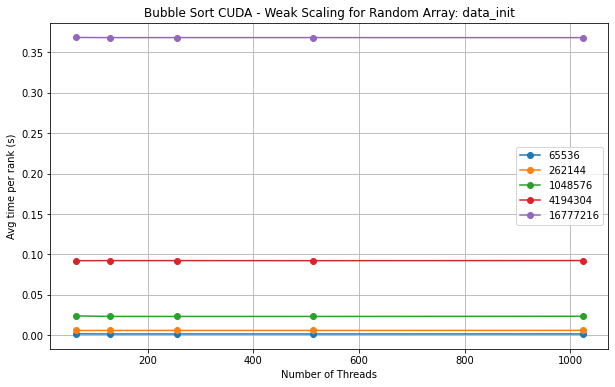

In [26]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Bubble Sort CUDA - Weak Scaling for Random Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()


# Reverse

In [27]:
tkreverse = th.Thicket.from_caliperreader(glob("cali_data_cuda/*2.cali"))
tkreverse.dataframe = tkreverse.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

gbreverse = tkreverse.groupby("InputSize")

ctkreverse = th.Thicket.concat_thickets(
    thickets=list(gbreverse.values()),
    headers=list(gbreverse.keys()),
    axis="columns",
    metadata_key="num_threads"
)

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afff943fb50>, 262144: <thicket.thicket.Thicket object at 0x2afffbf4db80>, 1048576: <thicket.thicket.Thicket object at 0x2afffbb99a30>, 4194304: <thicket.thicket.Thicket object at 0x2afffbe96bb0>, 16777216: <thicket.thicket.Thicket object at 0x2afff94925e0>}


In [28]:
ctkreverse.dataframe = ctkreverse.dataframe.reset_index().drop(("node"), axis=1)
ctkreverse.dataframe = ctkreverse.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


<ipython-input-28-c62cd0d6728e>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctkreverse.dataframe = ctkreverse.dataframe.reset_index().drop(("node"), axis=1)


In [29]:
main_function = ctkreverse.dataframe.loc["main_function"]
comm = ctkreverse.dataframe.loc["comm"]
comm_large = ctkreverse.dataframe.loc["comm_large"]
cudaMemoryCopy = ctkreverse.dataframe.loc["cudaMemoryCopy"]
comp = ctkreverse.dataframe.loc["comp"]
comp_large = ctkreverse.dataframe.loc["comp_large"]
correct_check = ctkreverse.dataframe.loc["correct_check"]
data_initialization = ctkreverse.dataframe.loc["data_initialization"]

regions = [main_function, comm, comm_large, cudaMemoryCopy, comp, comp_large, correct_check, data_initialization]
names = ["main_function", "comm", "comm_large","cudaMemoryCopy", "comp", "comp_large", "correct_check", "data_init"]

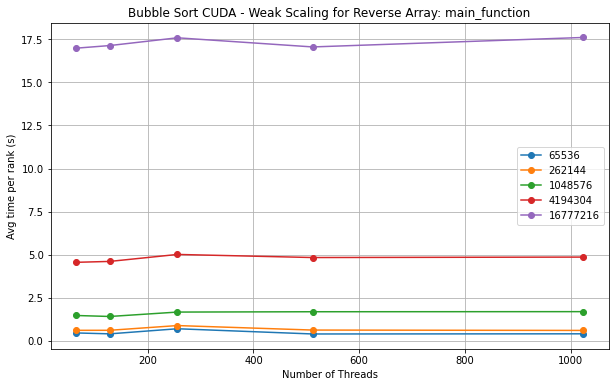

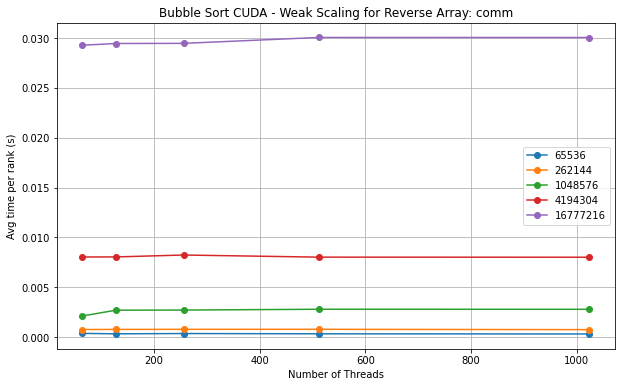

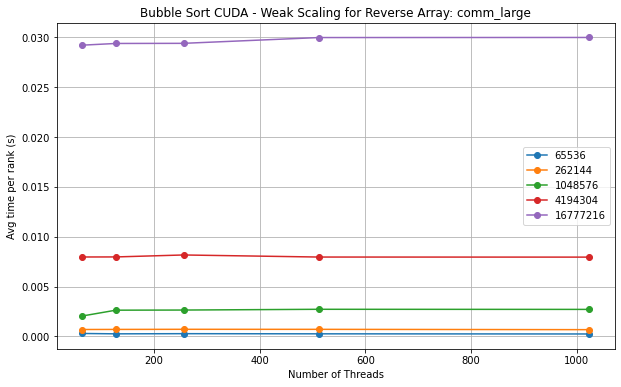

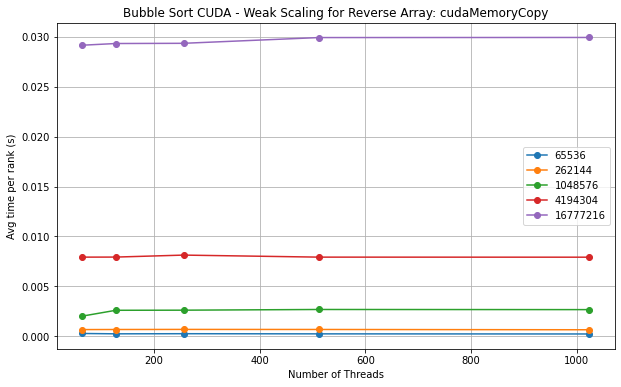

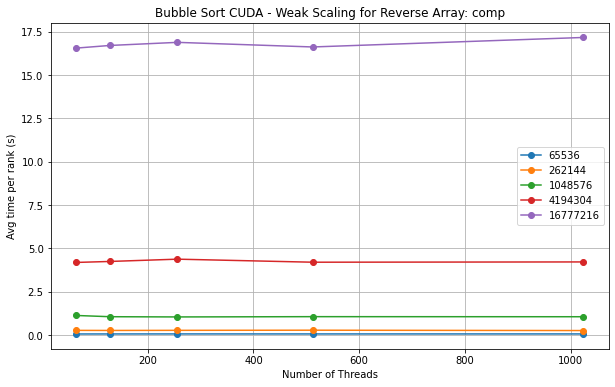

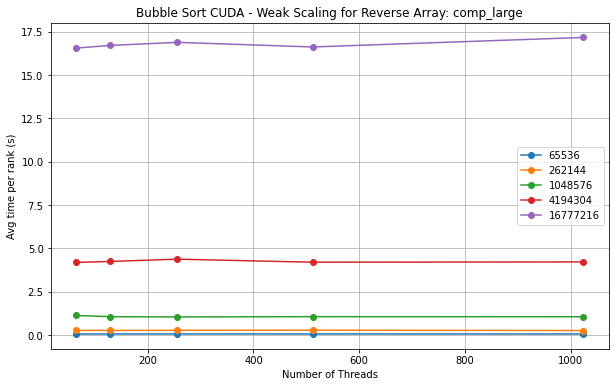

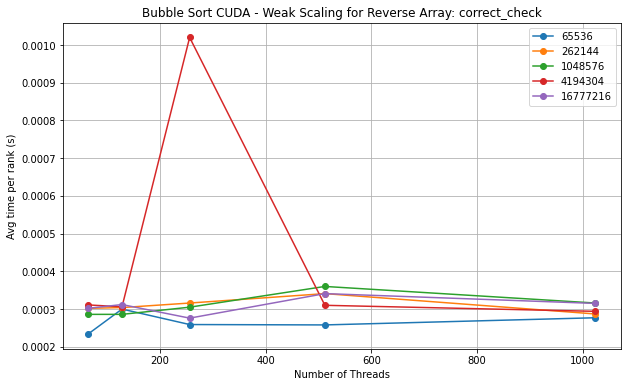

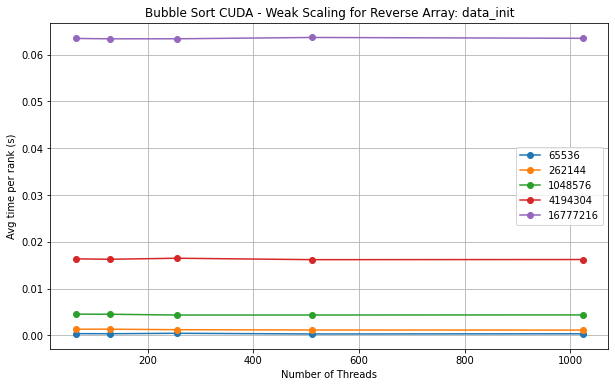

In [30]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Bubble Sort CUDA - Weak Scaling for Reverse Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()

# Sorted



In [31]:
tksorted = th.Thicket.from_caliperreader(glob("cali_data_cuda/*3.cali"))
tksorted.dataframe = tksorted.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

gbsorted = tksorted.groupby("InputSize")

ctksorted = th.Thicket.concat_thickets(
    thickets=list(gbsorted.values()),
    headers=list(gbsorted.keys()),
    axis="columns",
    metadata_key="num_threads"
)

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afff95c7e50>, 262144: <thicket.thicket.Thicket object at 0x2afffbdcfc40>, 1048576: <thicket.thicket.Thicket object at 0x2afffb9e69a0>, 4194304: <thicket.thicket.Thicket object at 0x2afffbbcca60>, 16777216: <thicket.thicket.Thicket object at 0x2afffbd1b4c0>}


In [32]:
ctksorted.dataframe = ctksorted.dataframe.reset_index().drop(("node"), axis=1)
ctksorted.dataframe = ctksorted.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


<ipython-input-32-18c7f60beaa2>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctksorted.dataframe = ctksorted.dataframe.reset_index().drop(("node"), axis=1)


In [33]:
main_function = ctksorted.dataframe.loc["main_function"]
comm = ctksorted.dataframe.loc["comm"]
comm_large = ctksorted.dataframe.loc["comm_large"]
cudaMemoryCopy = ctksorted.dataframe.loc["cudaMemoryCopy"]
comp = ctksorted.dataframe.loc["comp"]
comp_large = ctksorted.dataframe.loc["comp_large"]
correct_check = ctksorted.dataframe.loc["correct_check"]
data_initialization = ctksorted.dataframe.loc["data_initialization"]

regions = [main_function, comm, comm_large, cudaMemoryCopy, comp, comp_large, correct_check, data_initialization]
names = ["main_function", "comm", "comm_large","cudaMemoryCopy", "comp", "comp_large", "correct_check", "data_init"]

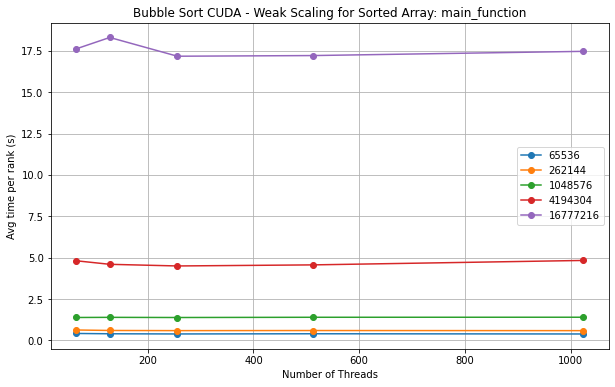

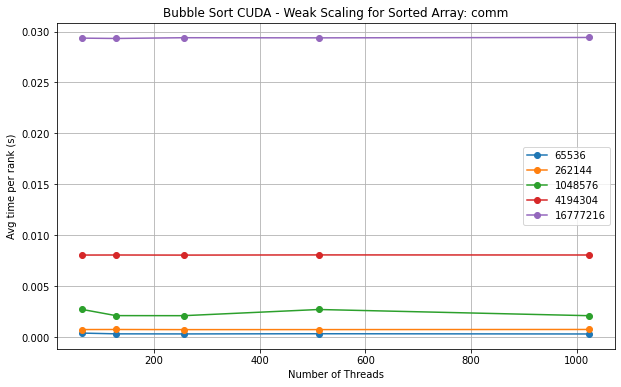

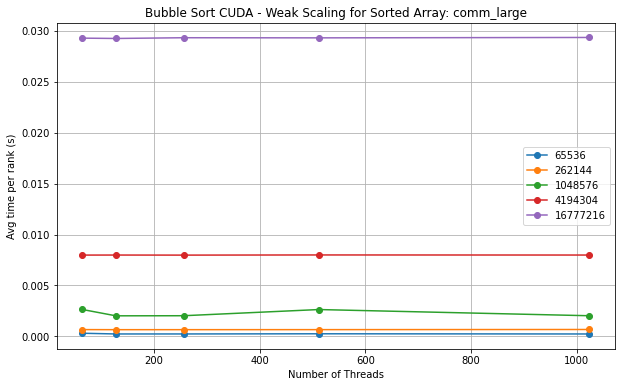

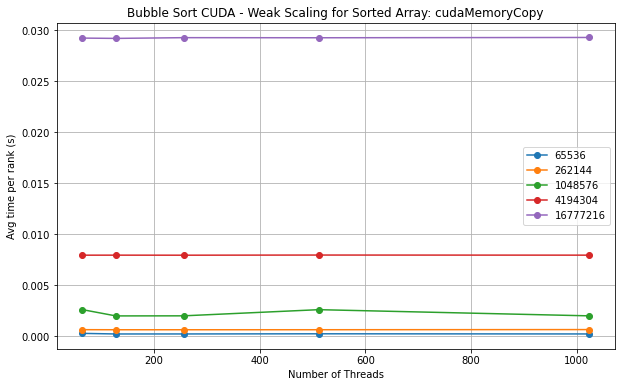

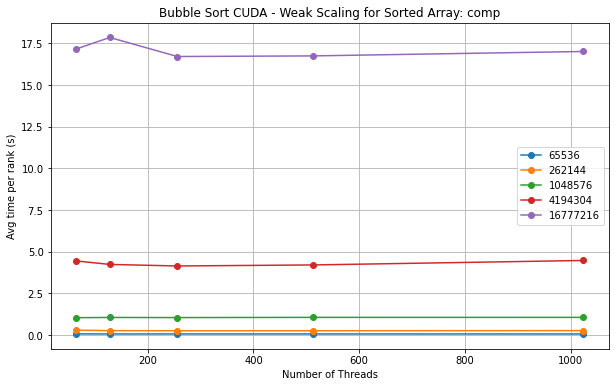

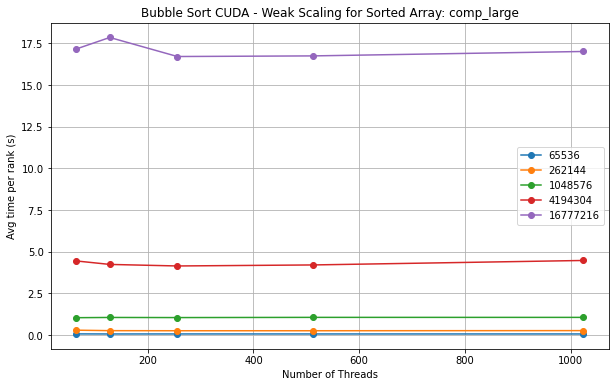

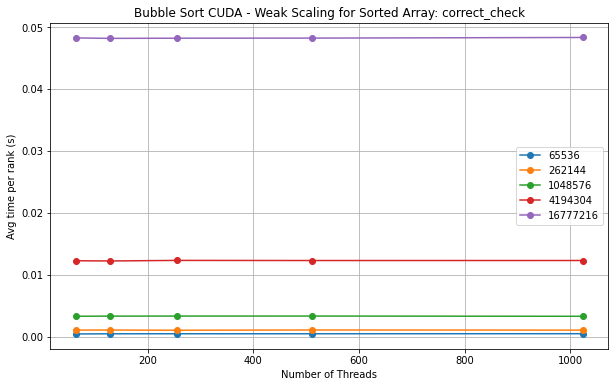

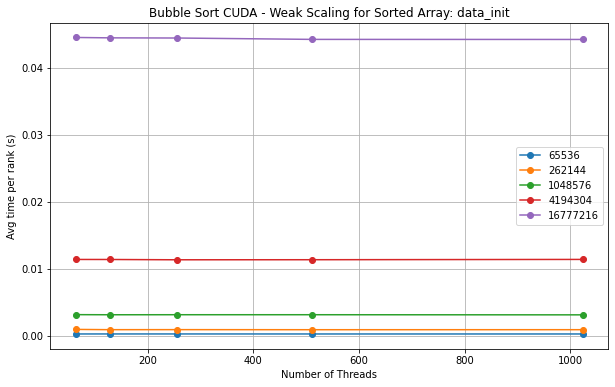

In [36]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Bubble Sort CUDA - Weak Scaling for Sorted Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()


# 1% Perturbed


In [37]:
tk1 = th.Thicket.from_caliperreader(glob("cali_data_cuda/*4.cali"))
tk1.dataframe = tk1.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

gb1 = tk1.groupby("InputSize")

ctk1 = th.Thicket.concat_thickets(
    thickets=list(gb1.values()),
    headers=list(gb1.keys()),
    axis="columns",
    metadata_key="num_threads"
)

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afffbae3ee0>, 262144: <thicket.thicket.Thicket object at 0x2afff94d0a60>, 1048576: <thicket.thicket.Thicket object at 0x2afff95d4e80>, 4194304: <thicket.thicket.Thicket object at 0x2afffba40130>, 16777216: <thicket.thicket.Thicket object at 0x2afffbd51340>}


In [18]:
ctk1.dataframe = ctk1.dataframe.reset_index().drop(("node"), axis=1)
ctk1.dataframe = ctk1.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

main_function = ctk1.dataframe.loc["main_function"]
comm = ctk1.dataframe.loc["comm"]
comm_large = ctk1.dataframe.loc["comm_large"]
cudaMemoryCopy = ctk1.dataframe.loc["cudaMemoryCopy"]
comp = ctk1.dataframe.loc["comp"]
comp_large = ctk1.dataframe.loc["comp_large"]
correct_check = ctk1.dataframe.loc["correct_check"]
data_initialization = ctk1.dataframe.loc["data_initialization"]

regions = [main_function, comm, comm_large, cudaMemoryCopy, comp, comp_large, correct_check, data_initialization]
names = ["main_function", "comm", "comm_large","cudaMemoryCopy", "comp", "comp_large", "correct_check", "data_init"]

<ipython-input-18-849d071d7c29>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk1.dataframe = ctk1.dataframe.reset_index().drop(("node"), axis=1)


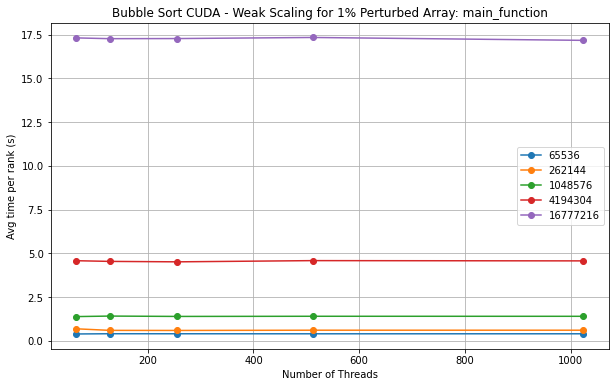

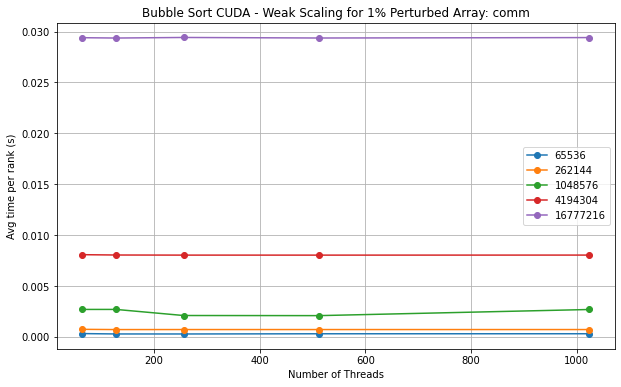

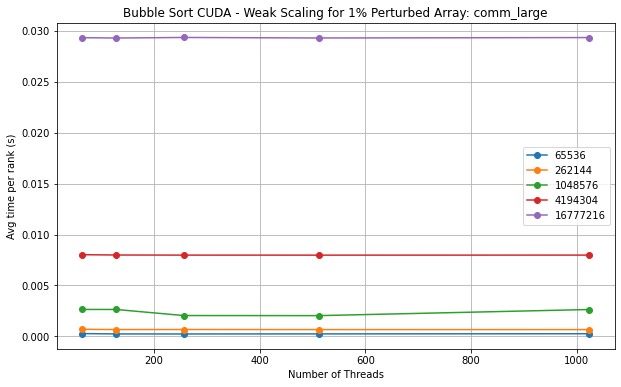

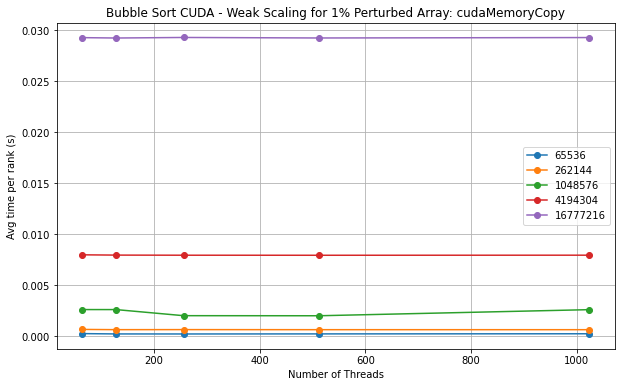

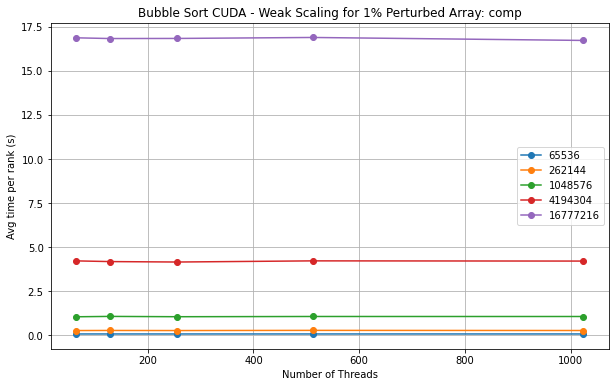

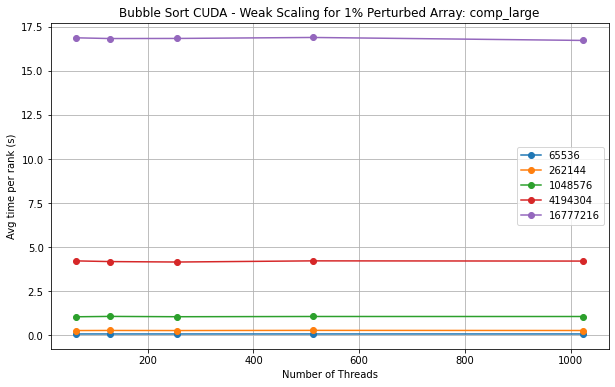

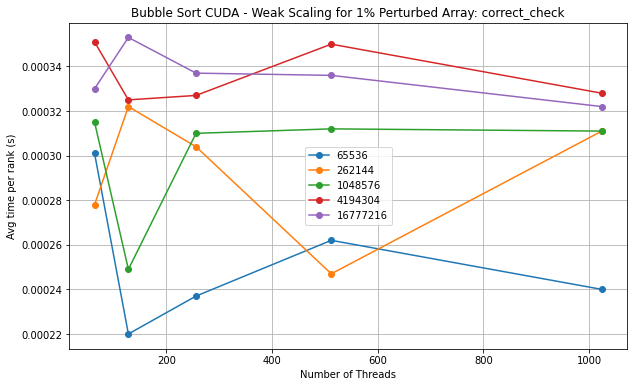

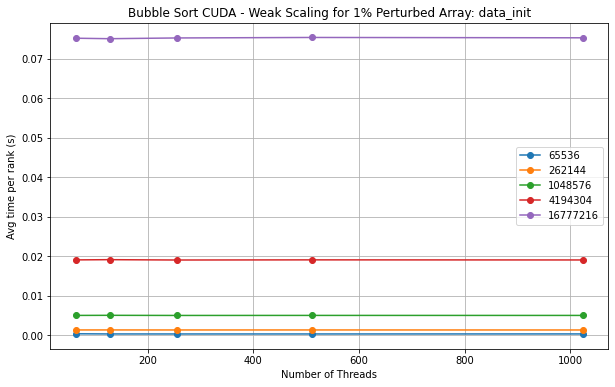

In [19]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Bubble Sort CUDA - Weak Scaling for 1% Perturbed Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()
